Mean Absolute Error: 1150.0
R² Score: -0.9001269502296838
Mean Absolute Error: 1050.8688804421542
R² Score: -0.6187155635642565


/opt/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


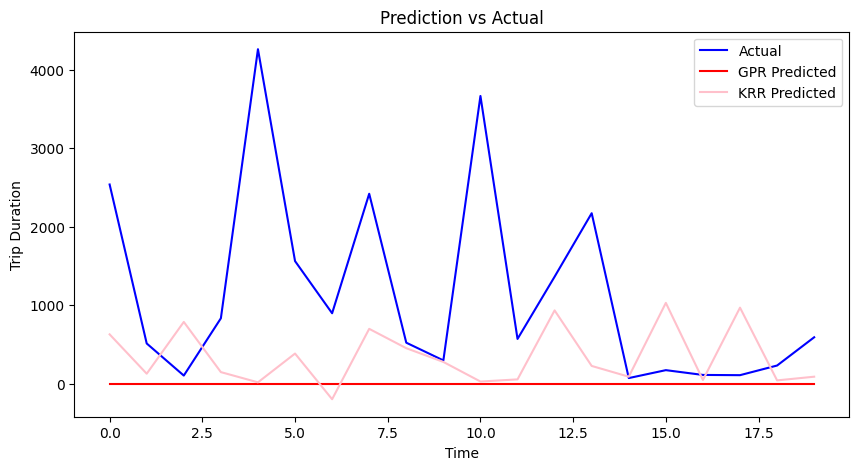

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, r2_score

x = np.array(range(len(rows))).reshape(-1, 1)
y = np.array(rows) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

kernel = C(1.0) * RBF(1.0)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)
gpr.fit(x_train, y_train)
y_pred1, sigma = gpr.predict(x_test, return_std=True)

mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

kr = KernelRidge(kernel="rbf")
kr.fit(x_train, y_train)
y_pred2 = kr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, color="red", label="Actual")
plt.plot(range(len(y_pred)), y_pred1, color="orange", label="GPR Predicted")
plt.plot(range(len(y_pred)), y_pred2, color="yellow", label="KRR Predicted")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Trip Duration")
plt.title("Prediction vs Actual")
plt.show()

GPR
Mean Absolute Error: 0.775461097028755
R² Score: -0.25715948268976585
y_pred1 shape: (50,), sigma shape: (50,)
KRR
Mean Absolute Error: 0.729139788284614
R² Score: -0.09331958988857836
RFR
Mean Absolute Error: 0.729139788284614
R² Score: -0.2596178097828674


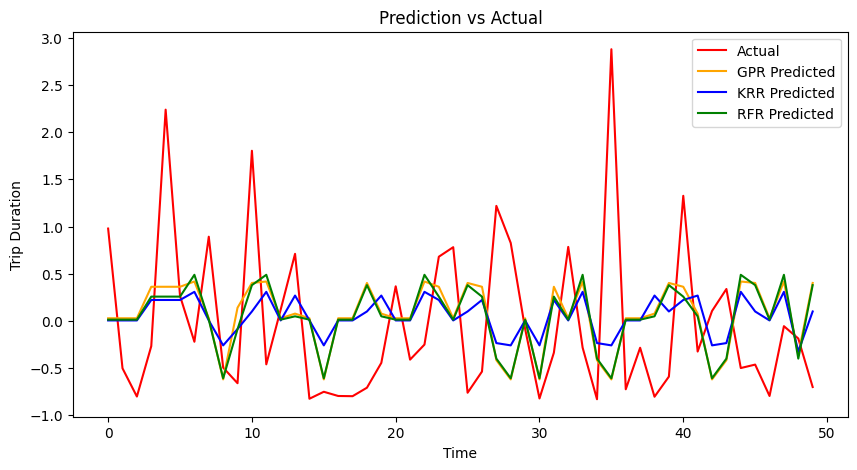

In [115]:
from sklearn.ensemble import RandomForestRegressor

df['StartTime'] = pd.to_datetime(df['StartTime'], format="%m/%d/%Y %H:%M:%S")  
df['hour'] = df['StartTime'].dt.hour  
df['day_of_week'] = df['StartTime'].dt.dayofweek  
df['month'] = df['StartTime'].dt.month  
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['weekday'] = (df['day_of_week'] <= 5).astype(int)

scaler = StandardScaler()
df['TripDuration'] = scaler.fit_transform(df[['TripDuration']])
x = df.loc[:99, ['hour', 'day_of_week', 'month', 'is_weekend', 'weekday']].values  
y = df.loc[:99, 'TripDuration'].values
#y = np.array(rows) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

kernel = C(1.0) * RBF(1.0)

#GPR
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)
gpr.fit(x_train, y_train)
y_pred1, sigma = gpr.predict(x_test, return_std=True)

mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print('GPR')
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")
print(f"y_pred1 shape: {y_pred1.shape}, sigma shape: {sigma.shape}")


#KRR
kr = KernelRidge(kernel="rbf")
kr.fit(x_train, y_train)
y_pred2 = kr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print('KRR')
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

#RFR
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred3 = rf.predict(x_test)

mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred3)
print('RFR')
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, color="red", label="Actual")
plt.plot(range(len(y_pred1)), y_pred1, color="orange", label="GPR Predicted")
plt.plot(range(len(y_pred2)), y_pred2, color="blue", label="KRR Predicted")
plt.plot(range(len(y_pred3)), y_pred3, color="green", label="RFR Predicted")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Trip Duration")
plt.title("Prediction vs Actual")
plt.show()

In [98]:
x1 = df.loc[:99, ['hour', 'day_of_week', 'month', 'is_weekend', 'weekday']].values  
y1 = df.loc[:99, 'TripDuration'].values

scaler = StandardScaler()
x1_scaled = scaler.fit_transform(x1)
next_x1 = np.arange(len(df), len(df) + 15).reshape(-1,1)
next_x1_scaled = scaler.transform(next_x1)

#Kernel
krr = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.1)
krr.fit(x1_scaled, y1)
y1_pred = krr.predict(next_x1_scaled)

#plt.subplot(2, 2, 3)
plt.plot(x1, y1, label='Original', color='#640064')
plt.plot(next_x1, y1_pred,label = 'Prediction', color='#ff0071', linestyle='dotted')
plt.xlabel('Time')
plt.ylabel('Trip Duration')
plt.legend()
plt.title('KRR Prediction')
plt.show()

#Gaussian 
kernel = C(1.0) * RBF(1.0) #C --> constant multiplier, RBF --> Radial Basis Function
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(x1_scaled, y)
y_pred, sigma = gpr.predict(next_x1_scaled, return_std=True)

#plt.subplot(2, 2, 4)
plt.plot(x1, y1, label='Original', color='#640064')
plt.plot(next_x1, y_pred, label='Prediction', color='#e41e2e', linestyle='dashed')
plt.fill_between(next_x1.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, color = '#ffccff', alpha = 0.3)
plt.xlabel('Time Period')
plt.ylabel('Median Trip Distance (miles)')
plt.legend()
plt.title('GPR Prediction')
plt.show()

ValueError: X has 1 features, but StandardScaler is expecting 5 features as input.